# **Stock Price Prediction using LSTM, Facebook Prophet and ARIMA**

In [1]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.416985  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.483712  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.622308  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.754259  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.734027  394024400
...               ...        ...        ...        ...        ...        ...
2020-06-15  83.312500  86.419998  83.144997  85.747498  83.742302  138808800
2020-06-16  87.864998  88.300003  86.180000  88.019997  85.961670  165428800
2020-06-17  88.787498  88.849998  87.772499  87.897499  85.842010  114406400
2020-06-18  87.852501  88.362503  87.305000  87.932503  85.876213   96820400
2020-06-19  88.660004  89.139999  86.287498  87.430000  85.385460  264476000

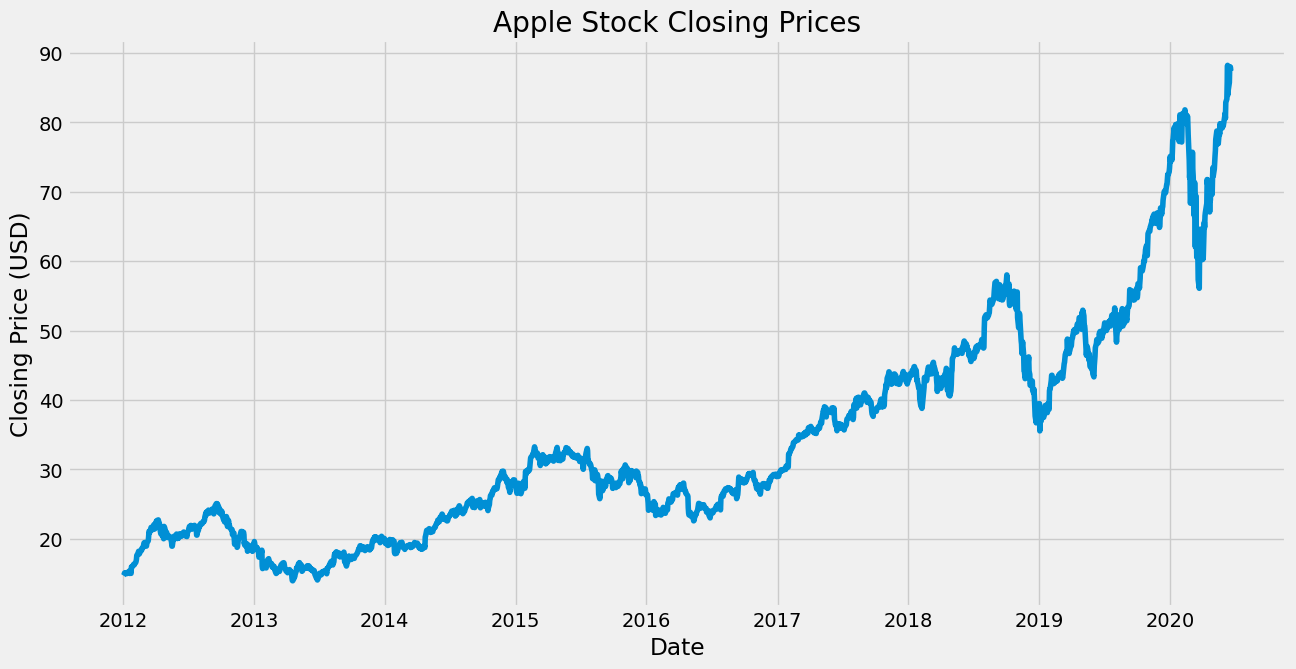

In [6]:
import yfinance as yf
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 6, 22)
df = yf.download("AAPL", start=start, end=end)
print(df)


plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()


In [7]:
print(df.head())
print(df.shape)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.416985  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.483712  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.622308  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.754259  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.734027  394024400
(2130, 6)


In [8]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()


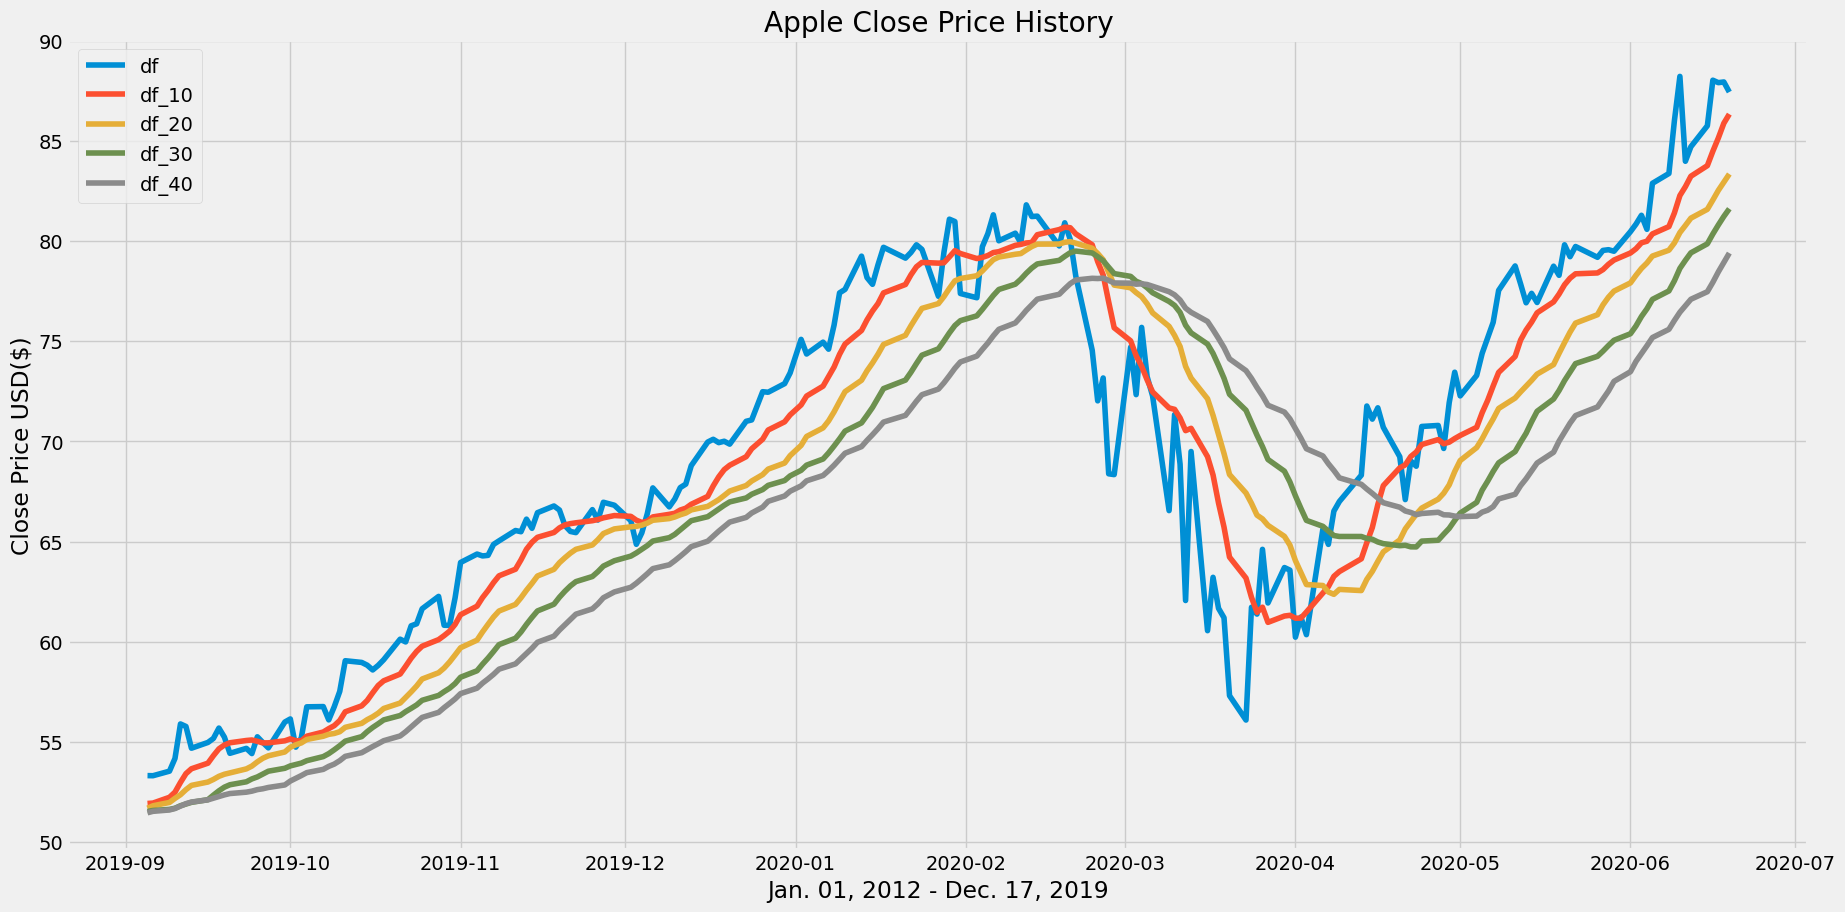

In [9]:

plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [10]:

data = df.filter(['Close'])
data.head()

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [11]:

dataset = data.values

In [12]:

training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1704

In [13]:

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.00995503],
        [0.01101786],
        [0.01322528],
        ...,
        [0.99579195],
        [0.9962633 ],
        [0.98949673]]),
 (2130, 1))

In [14]:

train_data = scaled_data[0:training_data_len,:]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.00995503, 0.01101786, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408131, 0.01643302,
       0.01855388, 0.01789982, 0.01431696, 0.01773631, 0.01436987,
       0.02699401, 0.02601775, 0.02729218, 0.03004785, 0.03171663,
       0.03157717, 0.03106259, 0.03325558, 0.03531872, 0.037656  ,
       0.04143122, 0.04936158, 0.04948181, 0.05389666, 0.05719575,
       0.05152573, 0.05370909, 0.05366581, 0.05978792, 0.05891744,
       0.06052852, 0.06342365, 0.06503475, 0.06967562, 0.07305647,
       0.07403274, 0.07437421, 0.06859356, 0.06719888, 0.06740568,
       0.07284008, 0.0743694 , 0.07765409, 0.08539688, 0.09572703,
       0.09379373, 0.09379853, 0.10126722, 0.10360451, 0.1019405 ,
       0.10042081, 0.09883858, 0.10409502, 0.10770193, 0.10921202])]
[0.10548007307678448]

[array([0.00995503, 0.01101786, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408131, 0.01643302,
       0.01855388, 0.01789982, 0.01

In [15]:

x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1644, 60, 1)

In [17]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:

model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
1644/1644 [==============================] - 23s 11ms/step - loss: 4.4966e-04
Epoch 2/20
1644/1644 [==============================] - 13s 8ms/step - loss: 2.5904e-04
Epoch 3/20
1644/1644 [==============================] - 13s 8ms/step - loss: 1.4335e-04
Epoch 4/20
1644/1644 [==============================] - 13s 8ms/step - loss: 1.4995e-04
Epoch 5/20
1644/1644 [==============================] - 17s 10ms/step - loss: 1.3048e-04
Epoch 6/20
1644/1644 [==============================] - 13s 8ms/step - loss: 9.7531e-05
Epoch 7/20
1644/1644 [==============================] - 13s 8ms/step - loss: 1.0821e-04
Epoch 8/20
1644/1644 [==============================] - 14s 9ms/step - loss: 1.0436e-04
Epoch 9/20
1644/1644 [==============================] - 13s 8ms/step - loss: 1.0043e-04
Epoch 10/20
1644/1644 [==============================] - 13s 8ms/step - loss: 9.7220e-05
Epoch 11/20
1644/1644 [==============================] - 14s 9ms/step - loss: 8.4159e-05
Epoch 12/20
1644/1644 [=====

In [20]:

test_data = scaled_data[training_data_len-60: , :]

x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [21]:
x_test = np.array(x_test)

In [22]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 1s 7ms/step


In [24]:
print(predictions[0:5], y_test[0:5])

[[57.544357]
 [54.65539 ]
 [54.52141 ]
 [56.613316]
 [55.080067]] [[54.09000015]
 [53.61249924]
 [55.52750015]
 [54.34000015]
 [55.53749847]]


In [25]:
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(0.00807009416587287, 0.08983370283959617)

<ipython-input-26-549ceefe4e21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


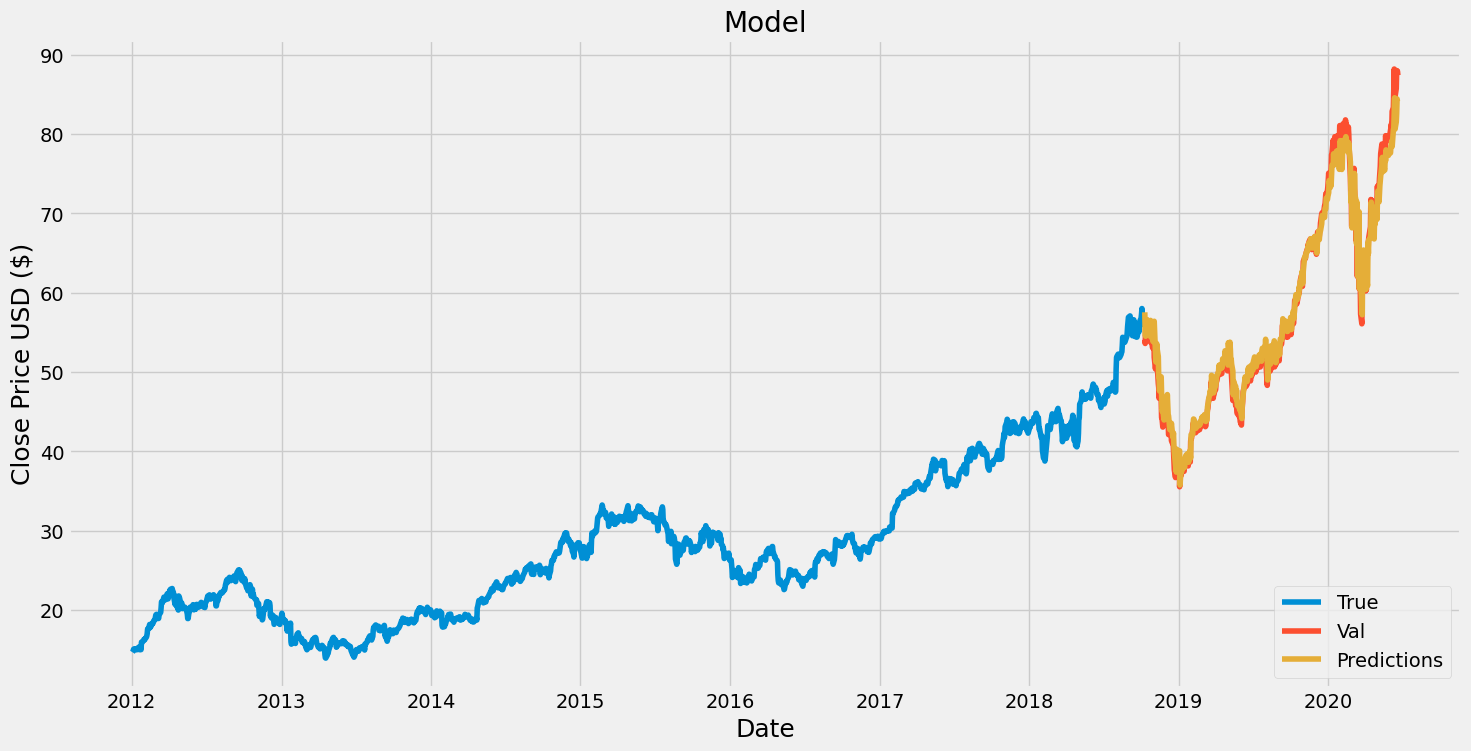

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [27]:
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 18ms/step
[[69.751595]]


In [34]:
apple_quote2 = yf.download('AAPL', start='2019-12-18',end = '2019-12-19')
apple_quote2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-18,69.949997,70.474998,69.779999,69.934998,67.953926,116028400


# **APPLE price prediction using facebook Prophet**


In [36]:
pip install prophet

In [50]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import prophet
from prophet import Prophet

In [40]:
df = yf.download('AAPL', start='2012-01-01', end='2020-06-22')

[*********************100%%**********************]  1 of 1 completed


In [41]:
df = df.reset_index()

In [42]:
df.shape, df.tail(), df.columns

((2130, 7),
            Date       Open       High        Low      Close  Adj Close  \
 2125 2020-06-15  83.312500  86.419998  83.144997  85.747498  83.742302   
 2126 2020-06-16  87.864998  88.300003  86.180000  88.019997  85.961670   
 2127 2020-06-17  88.787498  88.849998  87.772499  87.897499  85.842010   
 2128 2020-06-18  87.852501  88.362503  87.305000  87.932503  85.876213   
 2129 2020-06-19  88.660004  89.139999  86.287498  87.430000  85.385460   
 
          Volume  
 2125  138808800  
 2126  165428800  
 2127  114406400  
 2128   96820400  
 2129  264476000  ,
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object'))

In [43]:
df = df.filter(['Date','Close'])
df.head()

,Date,Close
0,2012-01-03,14.686786
1,2012-01-04,14.765714
2,2012-01-05,14.929643
3,2012-01-06,15.085714
4,2012-01-09,15.061786


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2130 non-null   datetime64[ns]
 1   Close   2130 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.4 KB


In [45]:
df.index[df['Close'] < 0]

Index([], dtype='int64')

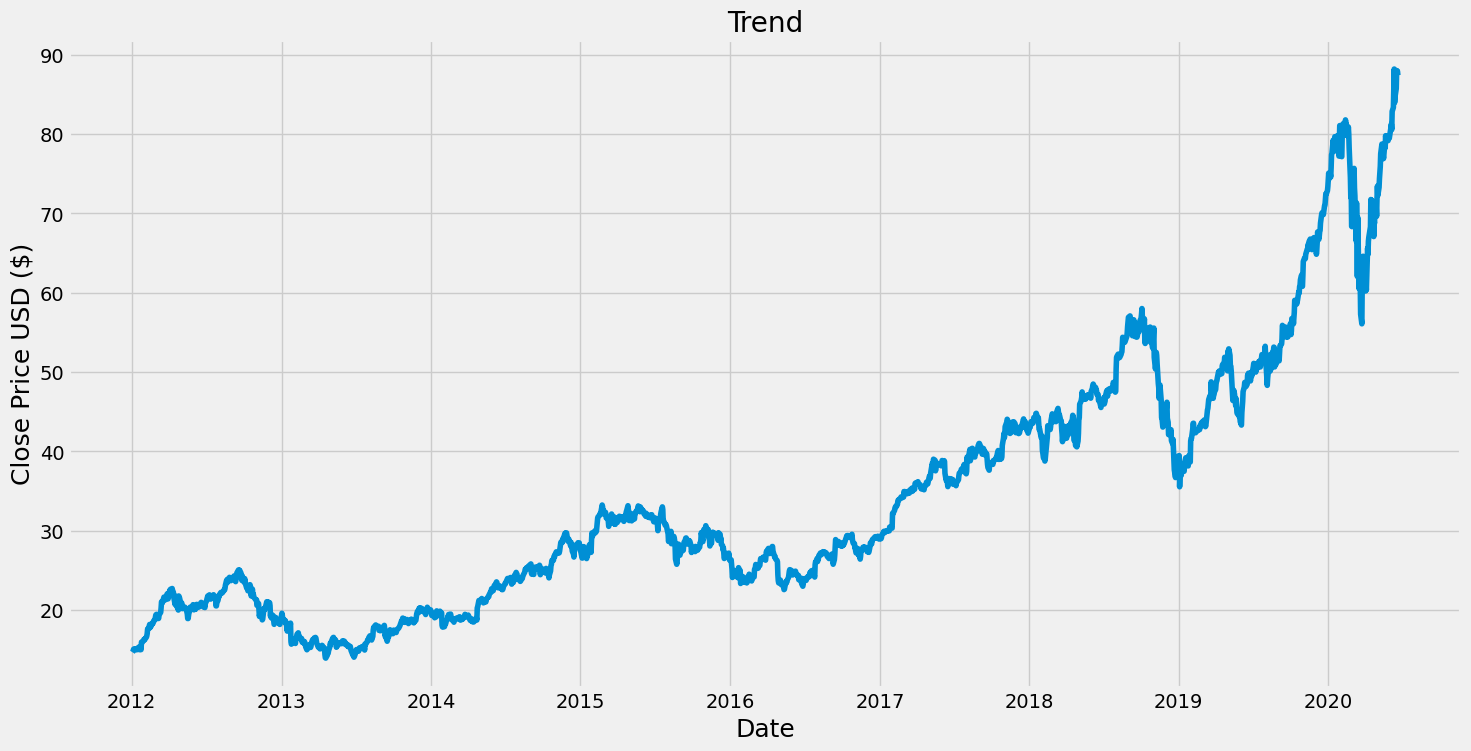

In [46]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [47]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)
y = df['Close_shift']

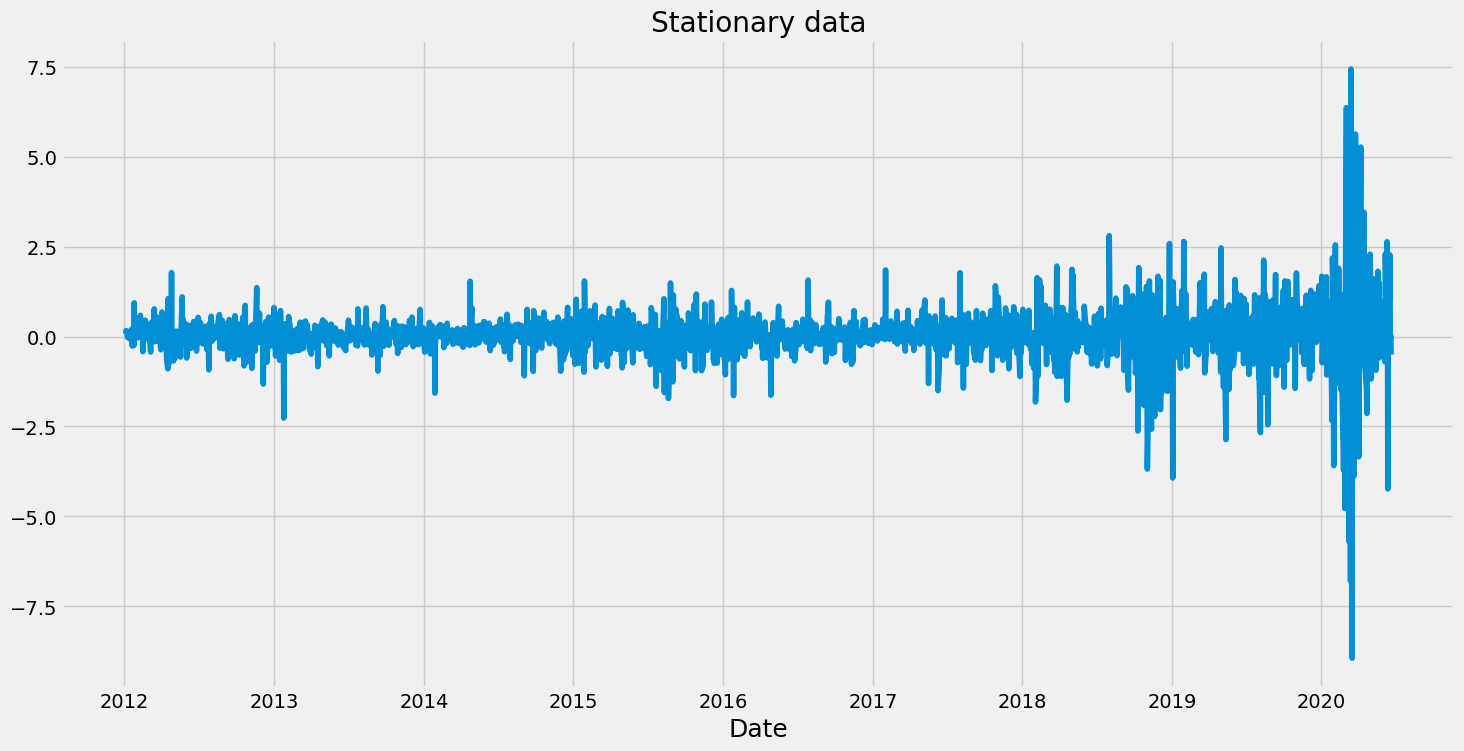

In [48]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

Now, the above graph looks stationary

In [51]:
model = Prophet()

In [52]:
df.columns

Index(['Date', 'Close', 'Close_shift'], dtype='object')

In [53]:
df_pht = df.rename(columns={'Date':'ds', 'Close_shift':'y'})#, inplace=True)

In [54]:
df_pht.head()

,ds,Close,y
0,2012-01-03,14.686786,NaN
1,2012-01-04,14.765714,0.078928
2,2012-01-05,14.929643,0.163929
3,2012-01-06,15.085714,0.156072
4,2012-01-09,15.061786,-0.023929


In [55]:
train_data_len = int(0.8*len(df))
train_data_len

1704

In [56]:
df_train = df_pht[:train_data_len]
df_test = df_pht[train_data_len:]
df_train.head(), df_train.shape

(          ds      Close         y
 0 2012-01-03  14.686786       NaN
 1 2012-01-04  14.765714  0.078928
 2 2012-01-05  14.929643  0.163929
 3 2012-01-06  15.085714  0.156072
 4 2012-01-09  15.061786 -0.023929,
 (1704, 3))

In [57]:
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkxp41z4/mt8iaxe3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkxp41z4/8q2h87gz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10793', 'data', 'file=/tmp/tmpdkxp41z4/mt8iaxe3.json', 'init=/tmp/tmpdkxp41z4/8q2h87gz.json', 'output', 'file=/tmp/tmpdkxp41z4/prophet_modelr421t9ef/prophet_model-20240611220358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
periods = len(df)-len(df_train)
periods

426

In [59]:
future_dates = model.make_future_dataframe(periods=periods)

In [60]:
future_dates.shape

(2129, 1)

In [61]:
future_dates.head()

,ds
0,2012-01-04
1,2012-01-05
2,2012-01-06
3,2012-01-09
4,2012-01-10


In [62]:
prediction = model.predict(future_dates)

In [63]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-04,0.015824,-0.545395,0.549107,0.015824,0.015824,-0.005541,-0.005541,-0.005541,-0.004168,-0.004168,-0.004168,-0.001374,-0.001374,-0.001374,0.0,0.0,0.0,0.010283
1,2012-01-05,0.015839,-0.597494,0.501293,0.015839,0.015839,-0.050445,-0.050445,-0.050445,-0.049132,-0.049132,-0.049132,-0.001313,-0.001313,-0.001313,0.0,0.0,0.0,-0.034606
2,2012-01-06,0.015853,-0.608133,0.454458,0.015853,0.015853,-0.061879,-0.061879,-0.061879,-0.059351,-0.059351,-0.059351,-0.002528,-0.002528,-0.002528,0.0,0.0,0.0,-0.046026
3,2012-01-09,0.015895,-0.450939,0.618237,0.015895,0.015895,0.044669,0.044669,0.044669,0.057796,0.057796,0.057796,-0.013127,-0.013127,-0.013127,0.0,0.0,0.0,0.060564
4,2012-01-10,0.015910,-0.527950,0.535120,0.015910,0.015910,-0.026815,-0.026815,-0.026815,-0.008239,-0.008239,-0.008239,-0.018575,-0.018575,-0.018575,0.0,0.0,0.0,-0.010905


**Narrative**


*   yhat : the predicted forecast
*   yhat_lower : the lower border of the prediction

*   yhat_upper: the upper border of the prediction





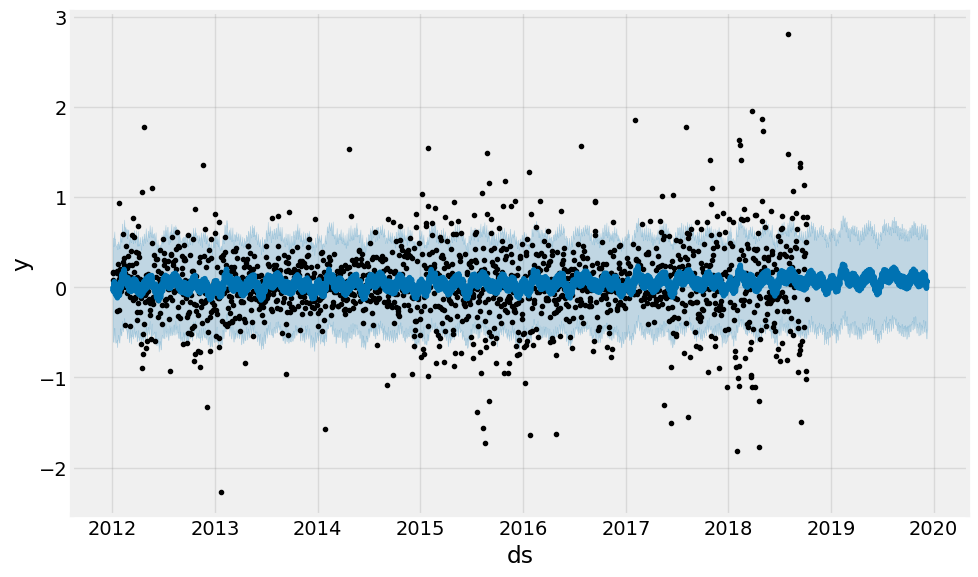

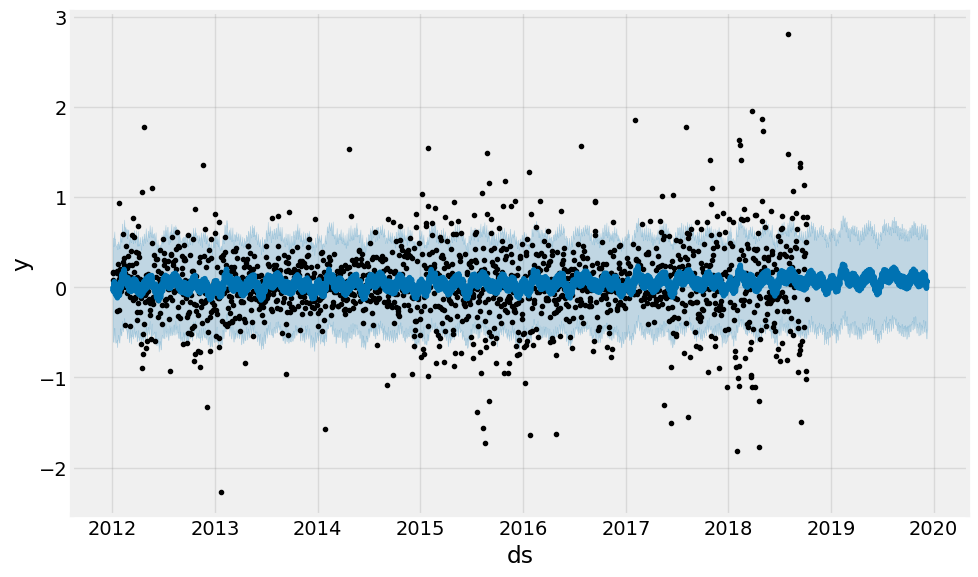

In [64]:
model.plot(prediction)

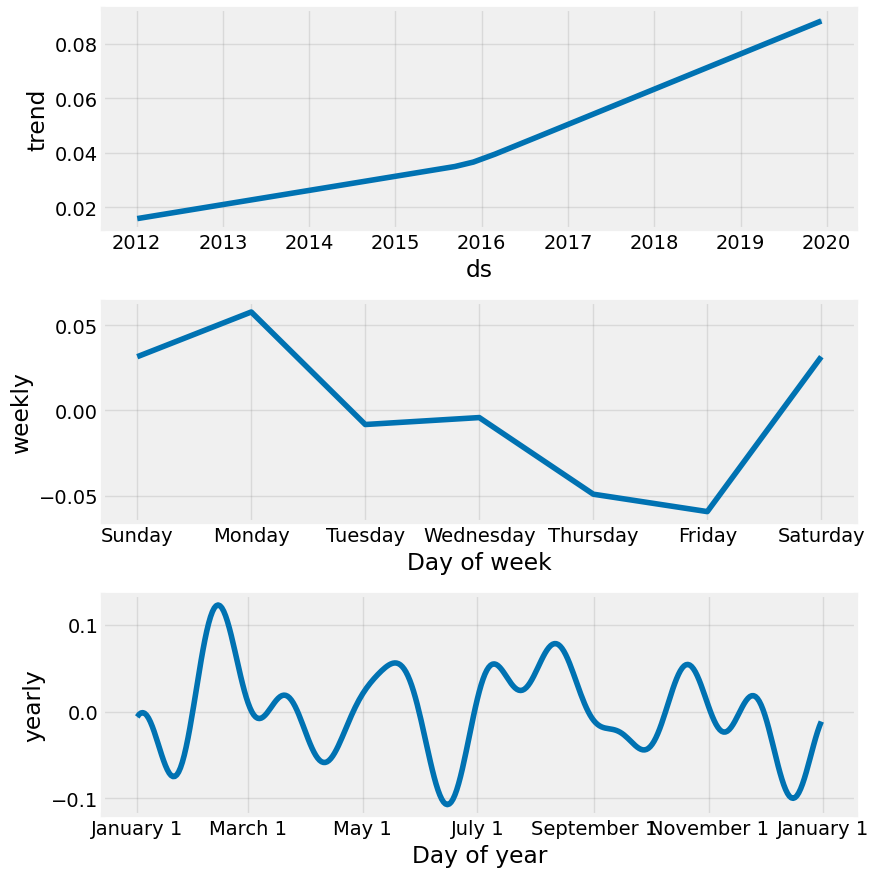

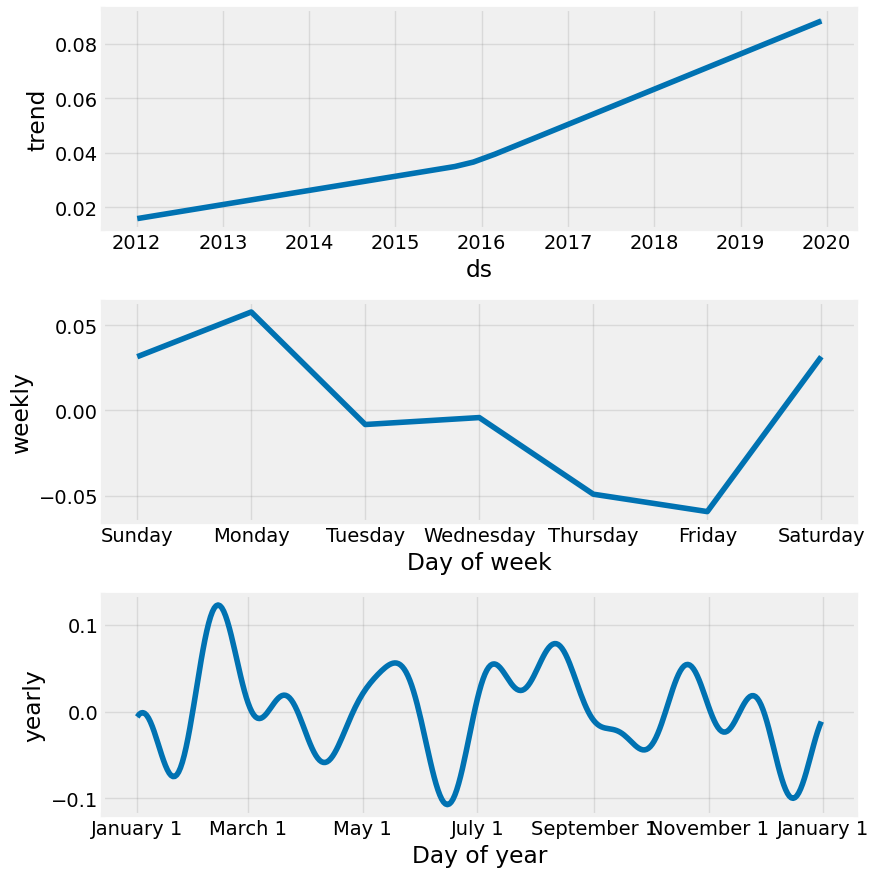

In [65]:
model.plot_components(prediction)

In [66]:
from prophet.diagnostics import cross_validation

In [67]:
df_train.shape, len(df)-len(df_train)

((1704, 3), 426)

In [68]:
cv = cross_validation(model, initial='1704 days', period='1 days', horizon = '427 days')

INFO:prophet:Making 340 forecasts with cutoffs between 2016-09-03 00:00:00 and 2017-08-08 00:00:00


  0%|          | 0/340 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkxp41z4/pe9zgv64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkxp41z4/dc_q19bm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37944', 'data', 'file=/tmp/tmpdkxp41z4/pe9zgv64.json', 'init=/tmp/tmpdkxp41z4/dc_q19bm.json', 'output', 'file=/tmp/tmpdkxp41z4/prophet_modelhst57wr_/prophet_model-20240611220445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkxp41z4/m4_08knc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkxp41z4/xuzshu2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [69]:
cv.head(), cv.shape

(          ds      yhat  yhat_lower  yhat_upper         y     cutoff
 0 2016-09-06  0.018116   -0.469085    0.563829 -0.007502 2016-09-03
 1 2016-09-07  0.040554   -0.440090    0.509752  0.165001 2016-09-03
 2 2016-09-08  0.008194   -0.502019    0.472847 -0.710001 2016-09-03
 3 2016-09-09 -0.002916   -0.495582    0.479151 -0.597500 2016-09-03
 4 2016-09-12  0.103839   -0.381616    0.582891  0.577501 2016-09-03,
 (100084, 6))

**Performance Metrics**

In [70]:
from prophet.diagnostics import performance_metrics

In [71]:

df_train_pm = performance_metrics(cv)

INFO:prophet:Skipping MAPE because y close to 0


In [72]:
df_train_pm

,horizon,mse,rmse,mae,mdape,smape,coverage
0,43 days,0.142070,0.376922,0.255981,0.988383,1.557856,0.858398
1,44 days,0.142241,0.377149,0.256217,0.988292,1.558254,0.858039
2,45 days,0.142280,0.377200,0.256381,0.987894,1.558641,0.857896
3,46 days,0.142318,0.377251,0.256529,0.987894,1.558924,0.857741
4,47 days,0.142349,0.377291,0.256661,0.987453,1.559067,0.857587
...,...,...,...,...,...,...,...
380,423 days,0.383933,0.619623,0.455691,1.027285,1.715693,0.651729
381,424 days,0.384886,0.620392,0.456512,1.027025,1.715834,0.650895
382,425 days,0.385818,0.621143,0.457292,1.027012,1.715971,0.649966
383,426 days,0.386757,0.621898,0.458094,1.027012,1.716190,0.648935


In [73]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MSE, RMSE

(0.25446864612041087, 0.4977579917940526)

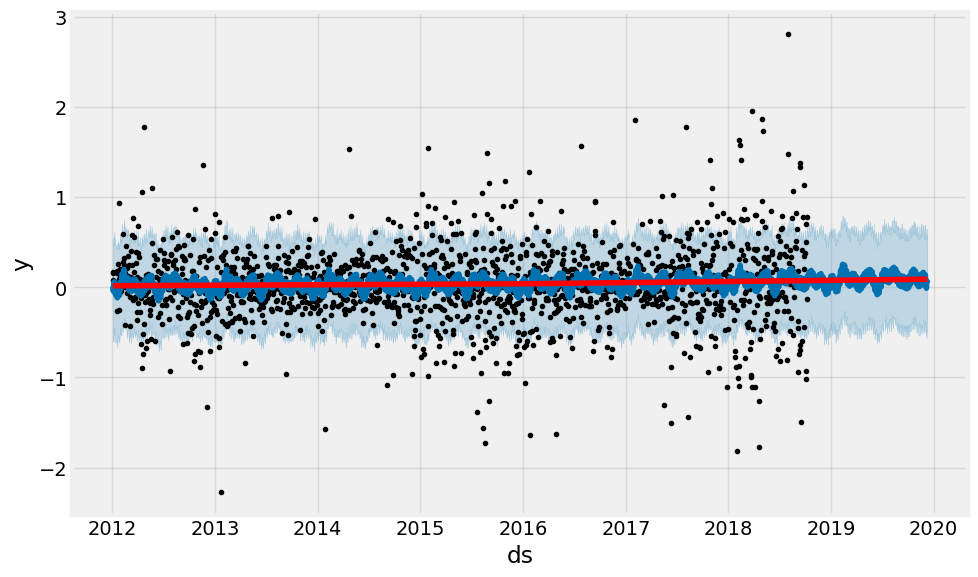

In [74]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

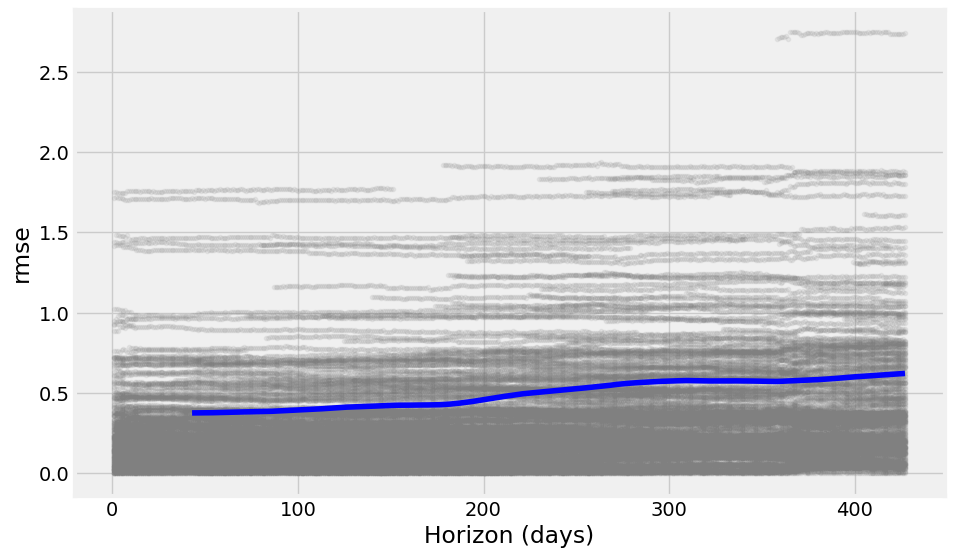

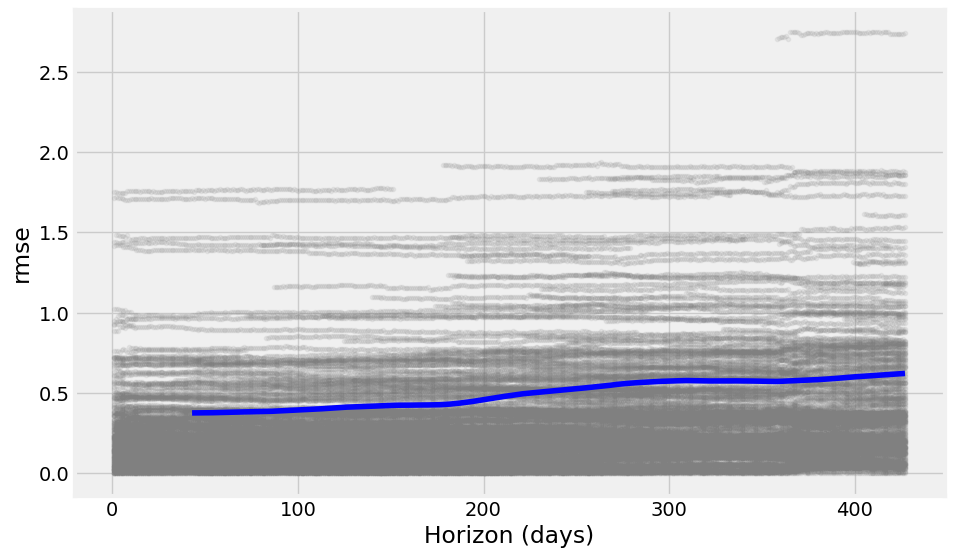

In [75]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')

# **APPLE price prediction using ARIMA Model**

In [77]:
import numpy as np
import pandas as pd
import os
import pandas_datareader as web
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
warnings.filterwarnings('ignore')

<ipython-input-77-a3d38d1b3f64>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


## Apple Stock Market Analyis

In [79]:
df = yf.download('AAPL', start='2012-01-01', end='2020-06-22')
df= df.reset_index()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416985,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622308,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754259,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734027,394024400


In [80]:
print(df.shape)
print(df.columns)

(2130, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2130 non-null   datetime64[ns]
 1   Open       2130 non-null   float64       
 2   High       2130 non-null   float64       
 3   Low        2130 non-null   float64       
 4   Close      2130 non-null   float64       
 5   Adj Close  2130 non-null   float64       
 6   Volume     2130 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 116.6 KB


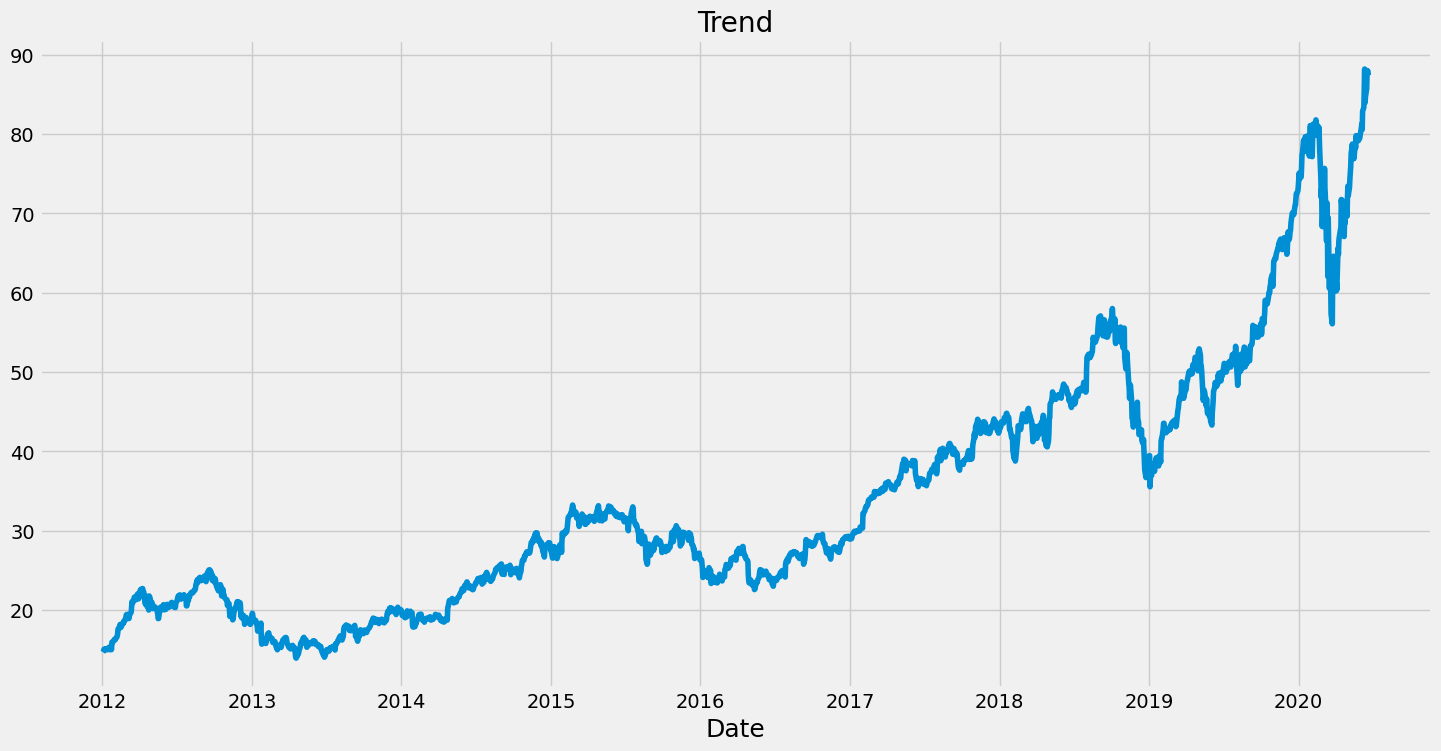

In [82]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
test_result = adfuller(df['Close'])

In [85]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [86]:
adfuller_test(df['Close'])

ADF Test Statistics : 1.0034843794766681
p-value : 0.9943025770874633
#Lags Used : 26
Number of Observations Used : 2103
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [87]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)

In [88]:
df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
df['Close_shift']

0       0.078928
1       0.078928
2       0.163929
3       0.156072
4      -0.023929
          ...   
2125    1.047501
2126    2.272499
2127   -0.122498
2128    0.035004
2129   -0.502502
Name: Close_shift, Length: 2130, dtype: float64

In [89]:
test_result = adfuller(df['Close_shift'])

In [90]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [91]:
adfuller_test(df['Close_shift'])

ADF Test Statistics : -7.853470825118789
p-value : 5.52162788238122e-12
#Lags Used : 25
Number of Observations Used : 2104
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


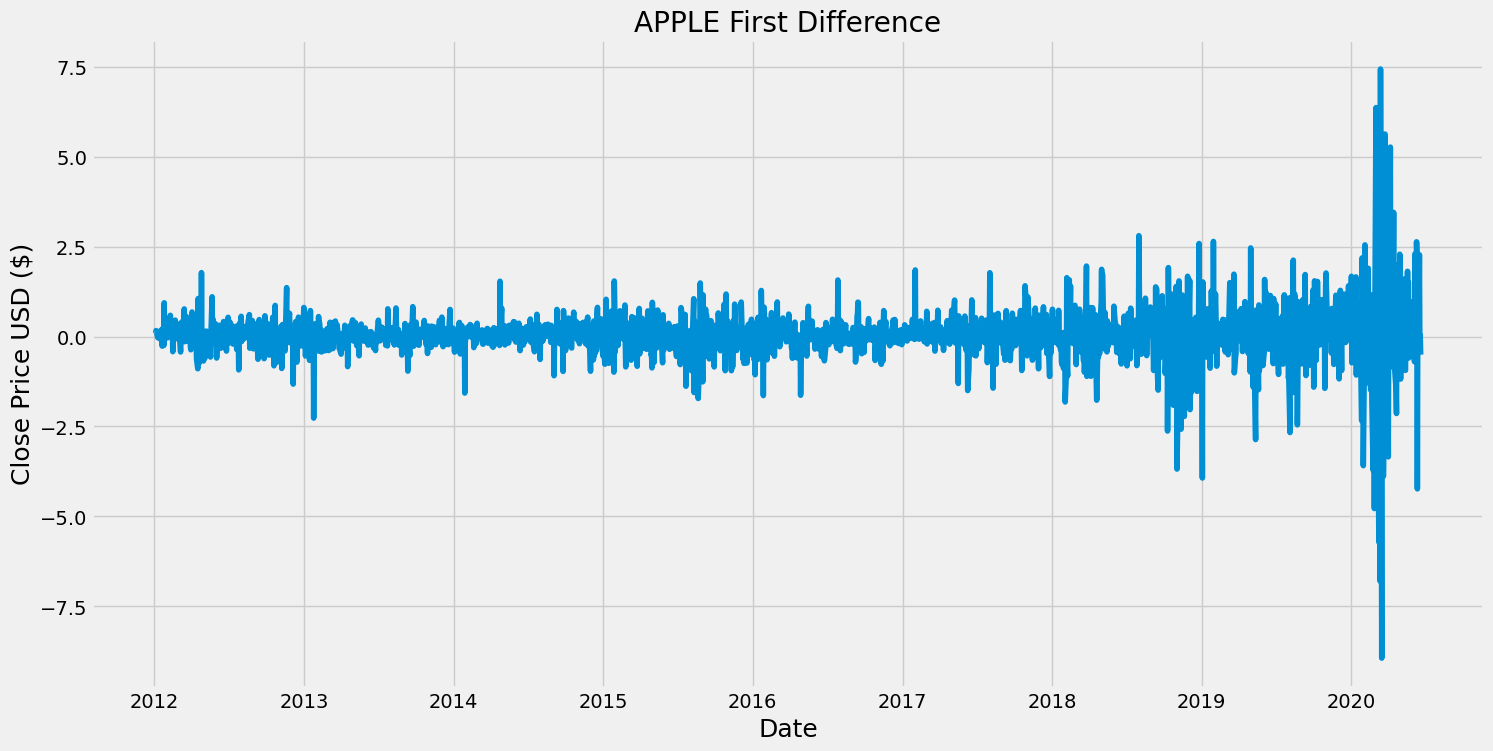

In [92]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

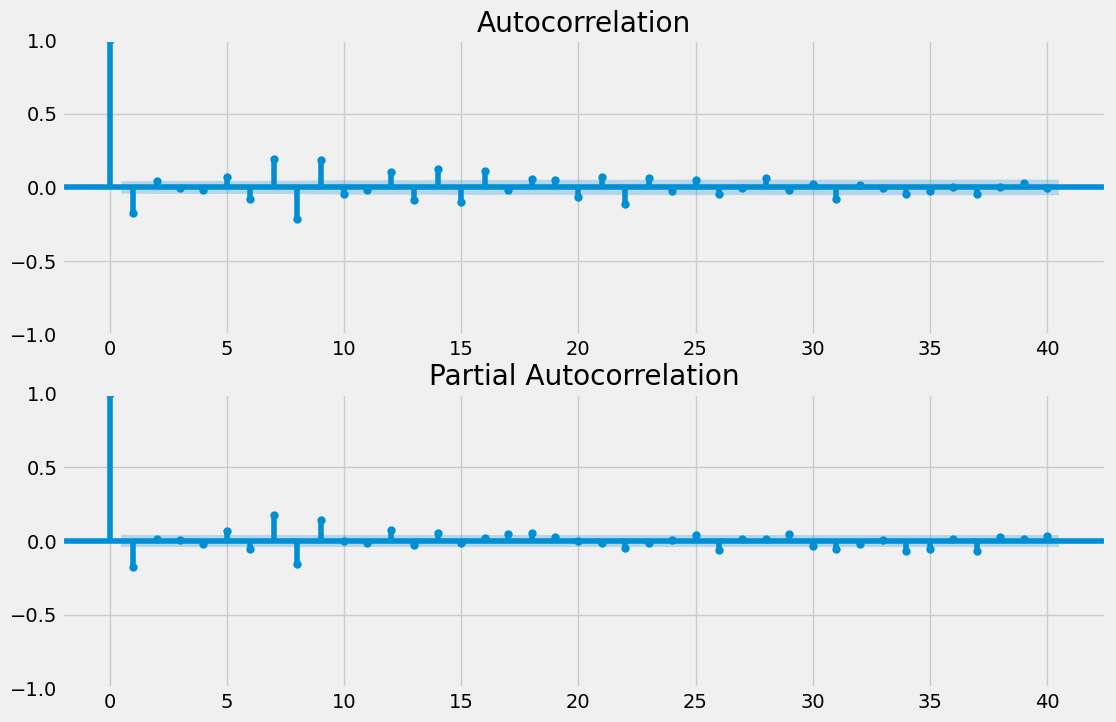

In [94]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close_shift'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close_shift'].iloc[1:],lags=40,ax=ax2)

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

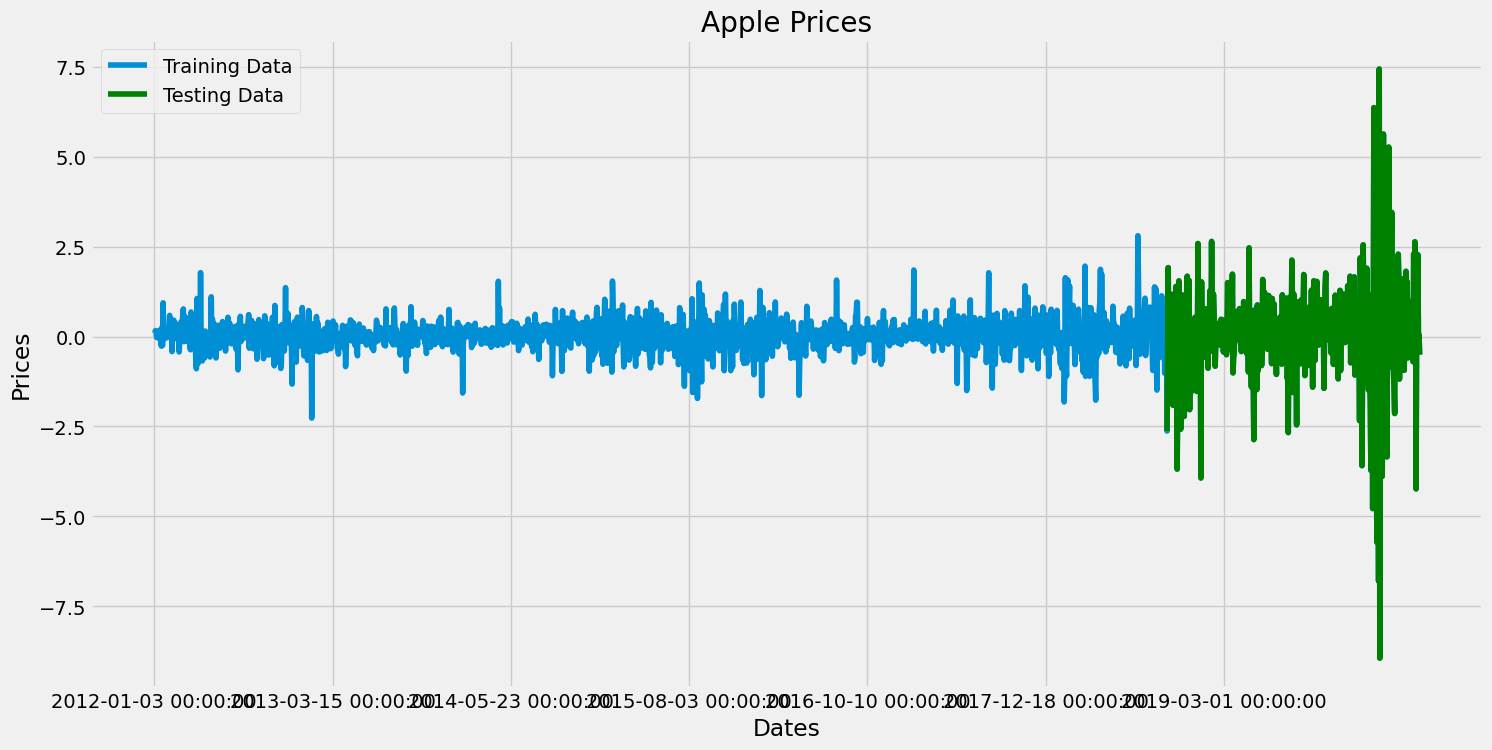

In [95]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close_shift'], label='Training Data')
plt.plot(test_data['Close_shift'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2000:300])
plt.legend()

In [99]:
from statsmodels.tsa.arima.model import ARIMA


In [100]:
model=ARIMA(df['Close_shift'],order=(1,0,1))
model_fit=model.fit()

In [101]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Close_shift   No. Observations:                 2130
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2381.589
Date:                Tue, 11 Jun 2024   AIC                           4771.178
Time:                        22:12:01   BIC                           4793.833
Sample:                             0   HQIC                          4779.470
                               - 2130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0342      0.015      2.349      0.019       0.006       0.063
ar.L1         -0.2473      0.037     -6.670      0.000      -0.320      -0.175
ma.L1          0.0730      0.040      1.815      0.070      -0.006       0.152
sigma2         0.5479      0.005     99.984      0.000       0.537       0.559
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             45786.46
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.80   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

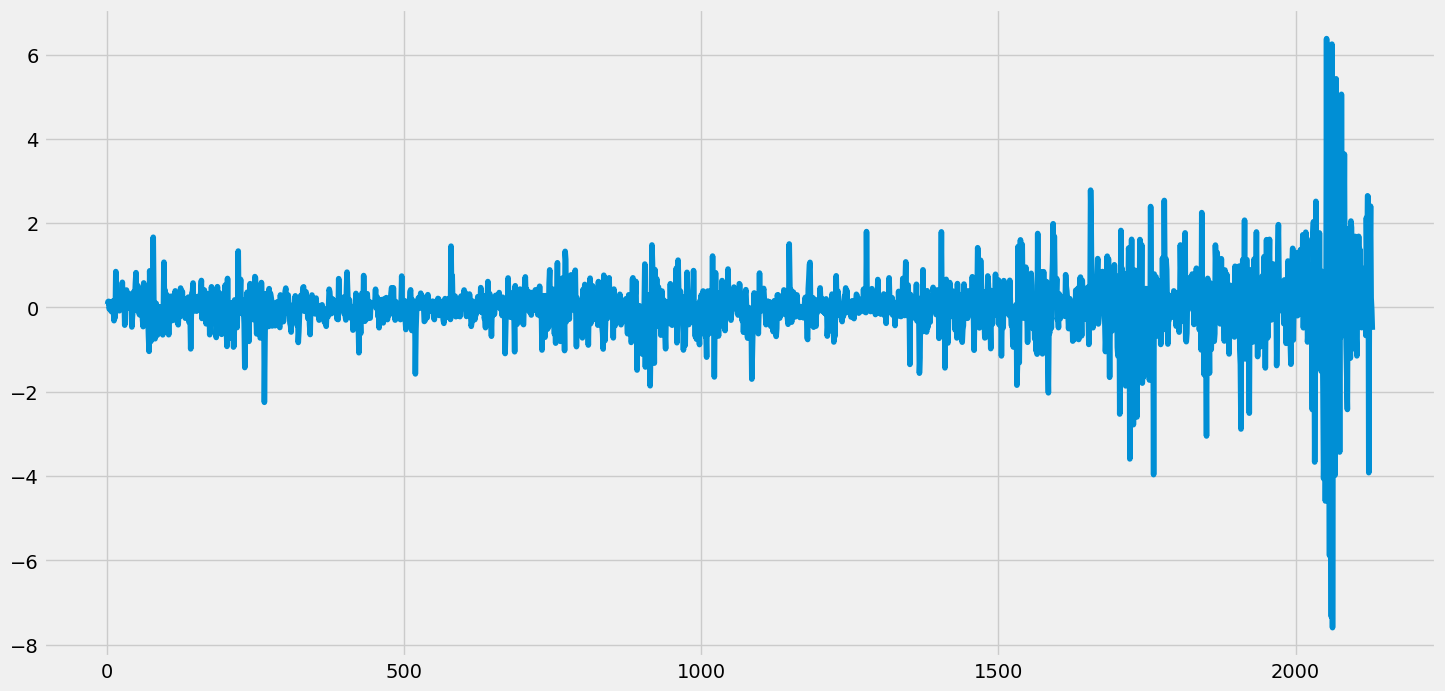

In [102]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
plt.plot(residuals)

<Axes: ylabel='Density'>

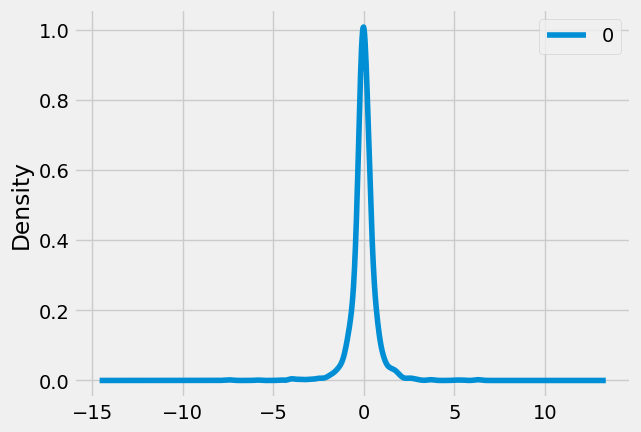

In [103]:
residuals.plot(kind='kde')

In [104]:
residuals.describe()

,0
count,2130.000000
mean,0.000008
std,0.740378
min,-7.599908
25%,-0.227710
50%,-0.006383
75%,0.260289
max,6.377796


In [105]:
train_arima = train_data['Close_shift'].values
test_arima = test_data['Close_shift'].values

In [107]:
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)

<class 'list'>
MSE : 2.827
RMSE : 1.681


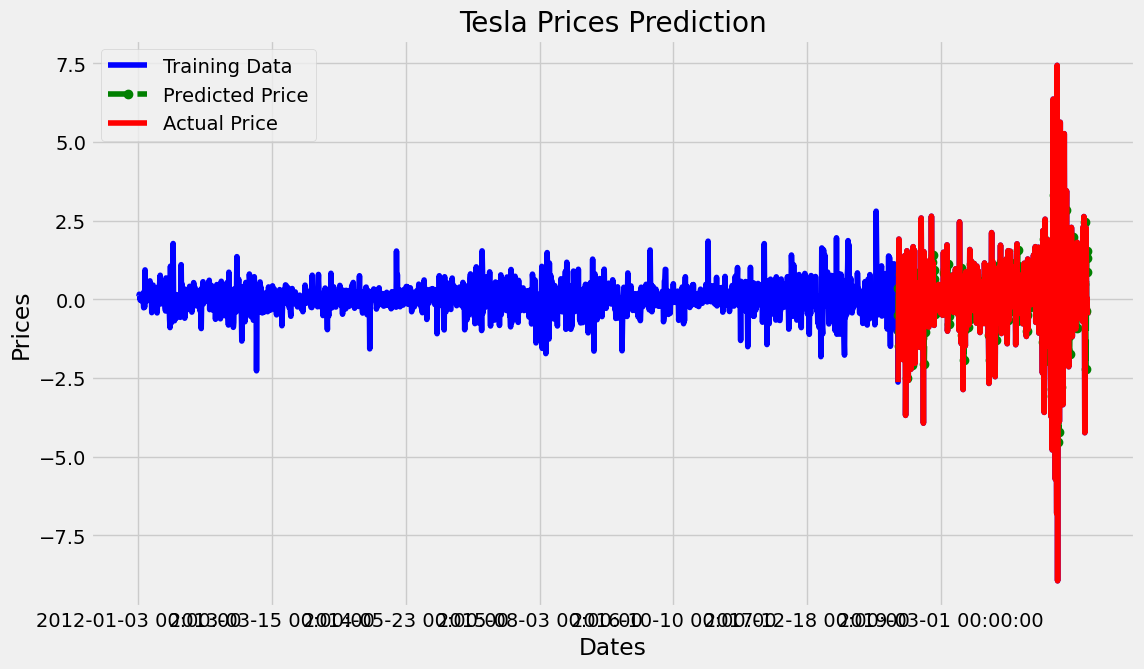

In [108]:
plt.figure(figsize=(12,7))
plt.plot(df['Close_shift'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

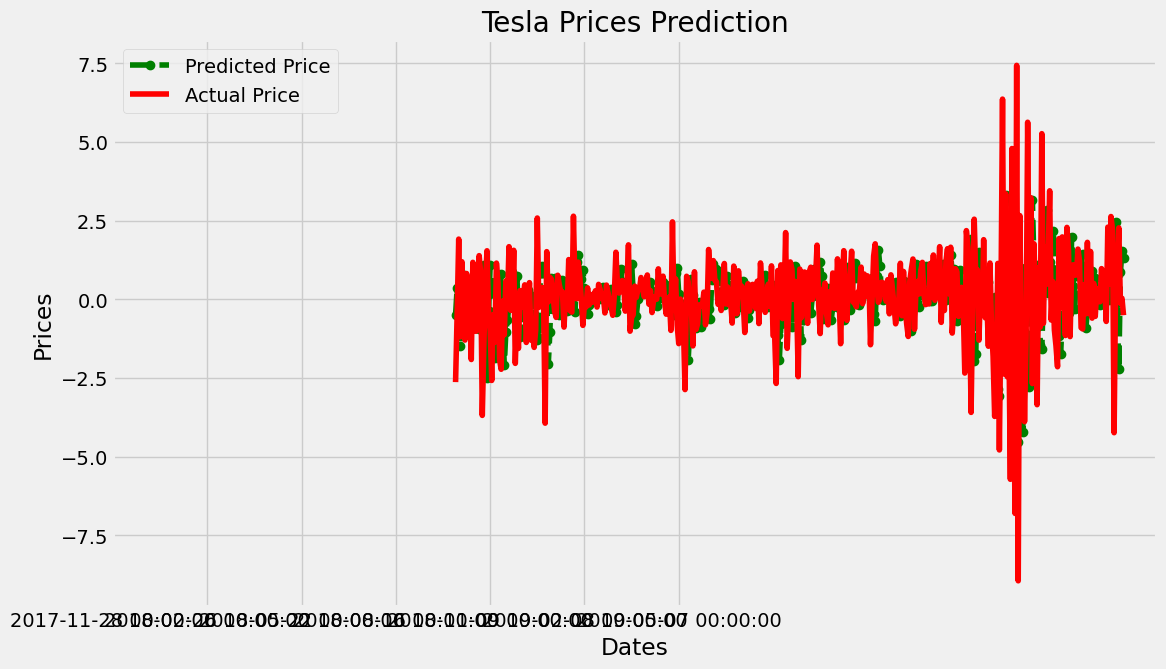

In [109]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()